In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('U.S._COVID-19_Self-Test_Data.csv')

In [5]:
df

,date,state,state_name,state_fips,fema_region,age_group,race,ethnicity,sex,test_result,total_tests
0,05/01/2022 12:00:00 AM,WA,Washington,53.0,Region 10,65-74 Years,Missing,Non-Hispanic,Female,Negative,62
1,05/01/2022 12:00:00 AM,MD,Maryland,24.0,Region 3,5-11 Years,Missing,Non-Hispanic,Male,Positive,4
2,05/01/2022 12:00:00 AM,GA,Georgia,13.0,Region 4,65-74 Years,Missing,Non-Hispanic,Male,Negative,20
3,05/01/2022 12:00:00 AM,OH,Ohio,39.0,Region 5,65-74 Years,Missing,Non-Hispanic,Female,Negative,18
4,05/01/2022 12:00:00 AM,VA,Virginia,51.0,Region 3,18-29 Years,Missing,Non-Hispanic,Female,Negative,34
...,...,...,...,...,...,...,...,...,...,...,...
623787,12/11/2022 12:00:00 AM,WA,Washington,53.0,Region 10,18-29 Years,Black,Non-Hispanic,Male,Negative,1
623788,09/18/2022 12:00:00 AM,NC,North Carolina,37.0,Region 4,30-39 Years,Black,Missing,Male,Negative,1
623789,07/24/2022 12:00:00 AM,WA,Washington,53.0,Region 10,18-29 Years,Black,Non-Hispanic,Male,Positive,1
623790,03/06/2022 12:00:00 AM,PA,Pennsylvania,42.0,Region 3,18-29 Years,More than one race or other race,Hispanic,Female,Positive,1


In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623792 entries, 0 to 623791
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         623792 non-null  object 
 1   state        623792 non-null  object 
 2   state_name   622907 non-null  object 
 3   state_fips   622907 non-null  float64
 4   fema_region  622907 non-null  object 
 5   age_group    623792 non-null  object 
 6   race         623792 non-null  object 
 7   ethnicity    623792 non-null  object 
 8   sex          623792 non-null  object 
 9   test_result  623792 non-null  object 
 10  total_tests  623792 non-null  int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 52.4+ MB


,state_fips,total_tests
count,622907.000000,623792.000000
mean,28.547095,19.284295
std,16.411245,218.779432
min,1.000000,1.000000
25%,13.000000,1.000000
50%,27.000000,2.000000
75%,41.000000,5.000000
max,78.000000,24178.000000


In [7]:
df.isna().sum()


date             0
state            0
state_name     885
state_fips     885
fema_region    885
age_group        0
race             0
ethnicity        0
sex              0
test_result      0
total_tests      0
dtype: int64

In [8]:
df.isnull().sum()

date             0
state            0
state_name     885
state_fips     885
fema_region    885
age_group        0
race             0
ethnicity        0
sex              0
test_result      0
total_tests      0
dtype: int64

In [9]:
data_cleaned = df.dropna(subset=['state_name', 'state_fips', 'fema_region'])

In [10]:
label_encoder = LabelEncoder()

# List of columns to encode
categorical_columns = ['state', 'state_name', 'fema_region', 'age_group', 'race', 'ethnicity', 'sex', 'test_result']

# Apply label encoding to the categorical columns
for column in categorical_columns:
    data_cleaned[column] = label_encoder.fit_transform(data_cleaned[column])

# Display the first few rows of the cleaned dataset
data_cleaned.head()

C:\Users\den\AppData\Local\Temp\ipykernel_40616\3681151336.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column] = label_encoder.fit_transform(data_cleaned[column])
C:\Users\den\AppData\Local\Temp\ipykernel_40616\3681151336.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column] = label_encoder.fit_transform(data_cleaned[column])
C:\Users\den\AppData\Local\Temp\ipykernel_40616\3681151336.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

,date,state,state_name,state_fips,fema_region,age_group,race,ethnicity,sex,test_result,total_tests
0,05/01/2022 12:00:00 AM,50,50,53.0,1,8,3,2,0,1,62
1,05/01/2022 12:00:00 AM,21,21,24.0,3,6,3,2,1,2,4
2,05/01/2022 12:00:00 AM,10,10,13.0,4,8,3,2,1,1,20
3,05/01/2022 12:00:00 AM,36,36,39.0,5,8,3,2,0,1,18
4,05/01/2022 12:00:00 AM,47,49,51.0,3,2,3,2,0,1,34


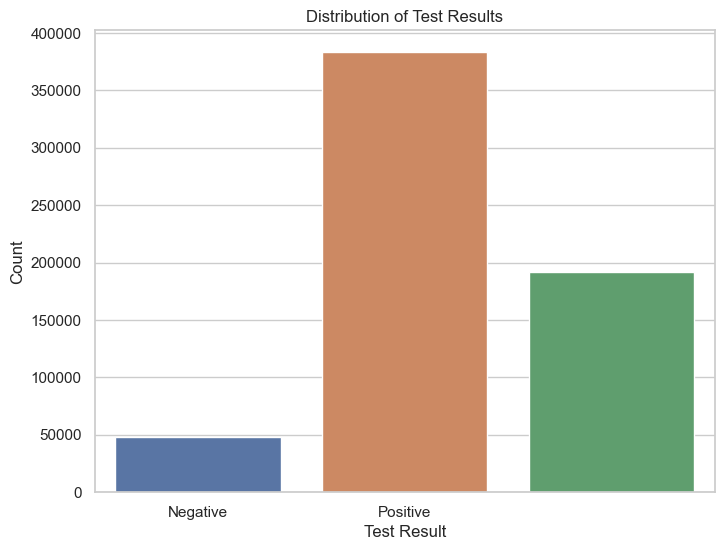

In [12]:
sns.set(style="whitegrid")

# Plot the distribution of test results
plt.figure(figsize=(8, 6))
sns.countplot(x='test_result', data=data_cleaned)
plt.title('Distribution of Test Results')
plt.xlabel('Test Result')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.show()

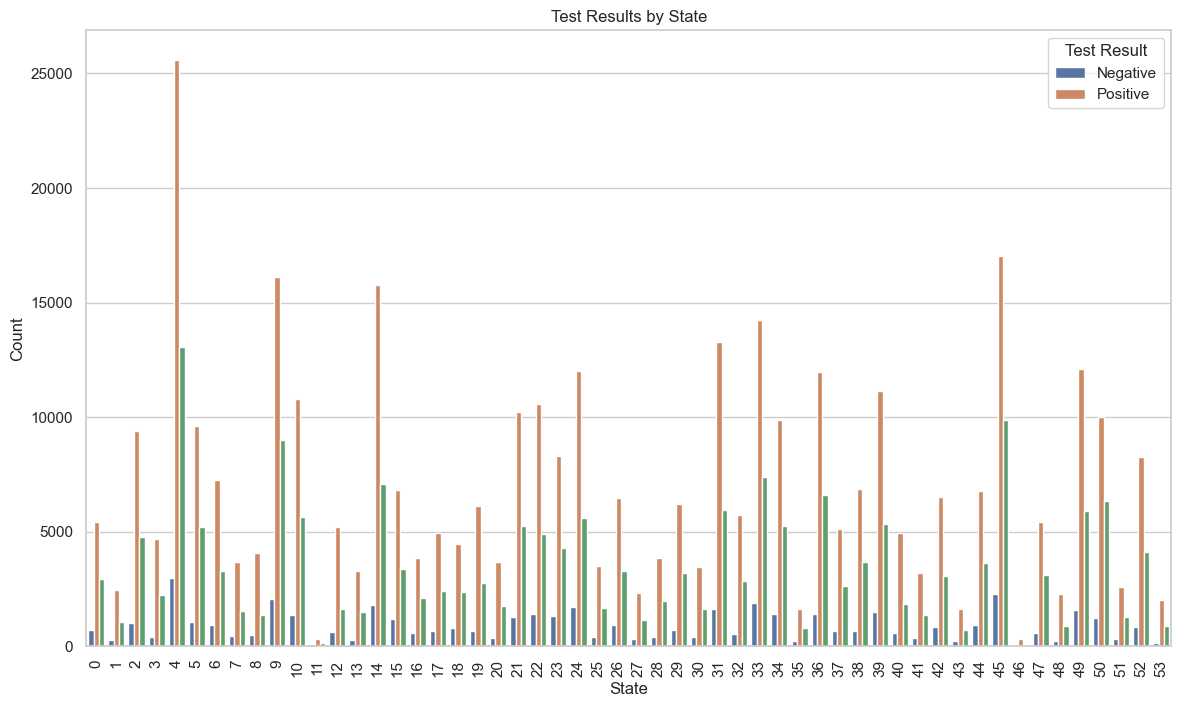

In [13]:
plt.figure(figsize=(14, 8))
sns.countplot(x='state_name', hue='test_result', data=data_cleaned)
plt.title('Test Results by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Test Result', labels=['Negative', 'Positive'])
plt.show()